# Data Analytics Example
## Young People Survey
#### Explore the preferences, interests, habits, opinions, and fears of young people

## About

The data to explore this comes from [Kaggle](https://www.kaggle.com), which is an awesome site for practicing you data scientist skills. The host competetions, and have a large pool of interesting datasets to play with!

In case you're looking for more small interesting datasets to poke, you can try [Corpora](https://github.com/dariusk/corpora)

#### [Your People Survey Data Details](https://www.kaggle.com/miroslavsabo/young-people-survey)

## Imports

In [12]:
# Imports
# Note that we're aliasing the package names
# These aliases are the most common way of using these modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Heatmap

# Configure visualisations
# Plotly
init_notebook_mode(connected=True)
# Matplotlib
%matplotlib inline
mpl.style.use( 'ggplot' )
pylab.rcParams[ 'figure.figsize' ] = 18.5, 10.5

## Load the Data

In [2]:
base_path = './data/'
# read in the csv files into a pandas dataframe objects
responses = pd.read_csv(base_path + 'responses.csv')
columns_map = pd.read_csv(base_path + 'columns.csv')

# Preview the data
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
# preview columns_map
columns_map.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


## Let's get a sense of the data

I'm particularly intreseted in looking at the **Phobias**, which is defiend as "a persistent, irrational fear of a specific object, activity, or situation that leads to a compelling desire to avoid it." ([Dictionary.com](http://www.dictionary.com/browse/phobia)).

Perhaps the first thing we can do is see what the distribution looks like. A simple histogram should do.
If we look back at how the data is formatted we find ourselves with a problem... we cannot feed this data directly to matplotlib's plotting function [`matplotlib.pyplot.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

In this dataset all the features are: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
(copied from the kaggle page)

1. Flying: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
2. Thunder, lightning: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
3. Darkness: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
4. Heights: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
5. Spiders: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
6. Snakes: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
7. Rats, mice: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
8. Ageing: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
9. Dangerous dogs: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
10. Public speaking: Not afraid at all 1-2-3-4-5 Very afraid of (integer)

### Preprocessing

Let's take the subset of the data we're interested in working with. Checkout [Pandas Selecting](http://pandas.pydata.org/pandas-docs/stable/10min.html#selection).

In [4]:
# print(responses.columns.values)  # uncomment to see all the columns names

# Get all the rows of the specified columns
phobias_df = responses.loc[:, 'Flying':'Fear of public speaking']
phobias_df.head()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0
3,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0
4,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0


In [5]:
# Define a function to be applied to every column
def actually_scared(column):
    """ 
    Since 1 means not afraid, we only want 
    to count any score of 2 to 5 
    """
    # Example of what's happening
    # [1,2,3,2,5] > 2
    # Output: [False, False, True, False, True]
    return column > 1

# The apply function applies the function by default to all the columns
binary_phobias_df = phobias_df.apply(actually_scared)

# Preview data
binary_phobias_df.head()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,False,False,False,False,False,True,True,False,True,True
1,False,False,False,True,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,True
3,True,False,False,True,True,True,True,True,True,True
4,False,True,False,False,False,False,True,True,True,True


In [6]:
# sum all the phobias so we can see which is the most feared!
# Note: False = 0, and True = 1
phobia_totals = binary_phobias_df.sum(axis=0)

# Display the resulting object
print(type(phobia_totals))  # type can tell you the type of the object
phobia_totals

<class 'pandas.core.series.Series'>


Flying                     544
Storm                      535
Darkness                   650
Heights                    756
Spiders                    719
Snakes                     771
Rats                       622
Ageing                     695
Dangerous dogs             831
Fear of public speaking    832
dtype: int64

Notice that the returned object is a [Series](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series) object, but with indexes denoting the fear. The [apply](https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_dataframes/) function of pandas is powerful, and essential! You might need to learn about [python lambdas](https://dbader.org/blog/python-lambda-functions).

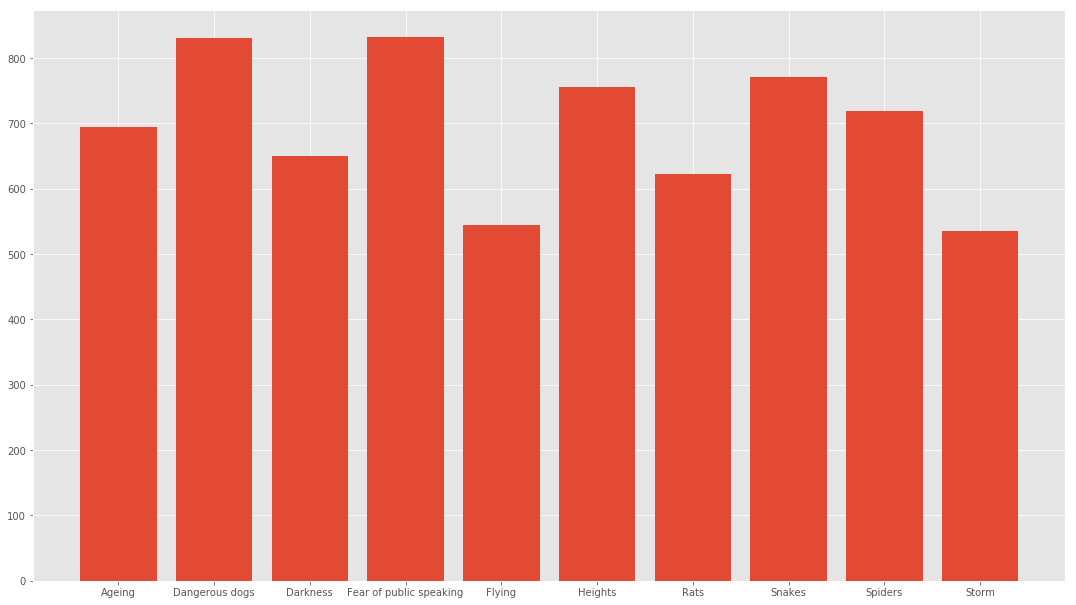

In [13]:
plt.bar(x=list(phobia_totals.index), height=phobia_totals);

Intresting, it seems that young people are most afraid of Dangerous dogs and Public Speaking... :p
More young people are afraid of public speaking than they are snakes!

Now I'm curious to see if there is any significant correlation of these fears with what kind of movies are watched.

1. I really enjoy watching movies.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
2. Horror movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
3. Thriller movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
4. Comedies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
5. Romantic movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
6. Sci-fi movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
7. War movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
8. Tales: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
9. Cartoons: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
10. Documentaries: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
11. Western movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
12. Action movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)

In [8]:
# print(responses.columns.values)  # uncomment to see all the columns names
movie_columns = ['Movies', 'Horror', 'Thriller', 'Comedy',
                    'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales' 
                     'Animated', 'Documentary', 'Western', 'Action']
phobia_columns = list(phobias_df.columns)

columns_of_interest = movie_columns + phobia_columns

# The following is to suppress a warning
# You can comment these two lines to see what the warning is
# it doesn't pertain to us
import warnings
warnings.filterwarnings('ignore')

# Get the data we want
movies_phobias_df = responses.loc[:, columns_of_interest]
movies_phobias_df.head()

,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy talesAnimated,Documentary,Western,...,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,NaN,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0
1,5.0,2.0,2.0,4.0,3.0,4.0,1.0,NaN,4.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0
2,5.0,3.0,4.0,4.0,2.0,4.0,2.0,NaN,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0
3,5.0,4.0,4.0,3.0,3.0,4.0,3.0,NaN,5.0,1.0,...,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0
4,5.0,4.0,4.0,5.0,2.0,3.0,3.0,NaN,3.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0


Now lets correlate!

In [9]:
# Enable Warnings again
warnings.filterwarnings('default')

# Drop the Fantasy/Fairy talesAnimated column
del movies_phobias_df['Fantasy/Fairy talesAnimated']

# Get Correlation Matrix
cor_matrix = movies_phobias_df.corr()  # performs correlation across all the columns

# filter removes the movies columns, and drop removes the phobia rows
filtered_cor_matrix = cor_matrix.filter(phobia_columns).drop(phobia_columns)  
filtered_cor_matrix

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
Movies,-0.040698,-0.047108,-0.023075,-0.014906,0.073421,0.082287,0.037115,-0.005604,0.024757,0.022696
Horror,-0.028568,-0.102612,-0.065734,-0.036473,-0.053262,-0.129229,-0.045793,0.013435,-0.090562,-0.000874
Thriller,-0.091640,-0.089484,-0.105993,-0.046637,-0.023817,-0.091205,-0.022029,0.016998,-0.060241,0.023629
Comedy,0.024546,0.035985,0.019472,0.018058,0.081108,0.086018,0.075053,0.005766,0.027266,-0.015447
Romantic,0.111102,0.219647,0.236684,0.039493,0.244804,0.286371,0.260119,0.120173,0.174205,0.045847
Sci-fi,-0.044463,-0.119811,-0.108309,-0.060319,-0.061434,-0.142338,-0.141349,-0.109566,-0.142804,0.003485
War,-0.122245,-0.166480,-0.162062,-0.049559,-0.138973,-0.099624,-0.088333,-0.078558,-0.116129,-0.078687
Documentary,-0.064650,-0.078565,-0.063395,-0.019821,-0.027763,-0.066947,-0.129333,-0.042376,-0.086378,-0.039723
Western,-0.062715,-0.126772,-0.150405,-0.022878,-0.113079,-0.105332,-0.153128,-0.112341,-0.159980,-0.088096
Action,-0.072120,-0.173784,-0.153823,-0.027284,-0.089052,-0.046595,-0.097690,-0.086922,-0.130387,-0.049068


In [14]:
heatmap_plt = Heatmap(
    z=filtered_cor_matrix.values,
    x=list(filtered_cor_matrix.columns),
    y=list(filtered_cor_matrix.index)
)
data = [heatmap_plt]
iplot(data, filename='labelled-heatmap')

With plotly you can get interactive plots! Note that I had to make sure the notebook was setup to be used [offline](https://plot.ly/python/offline/) in order to get this to work. No plotly account needed.

It seems like we have a week correlation between those who like romantic movies and fear snakes?

## Conclusion

Young people are mostly afraid of dangerous dogs and public speaking, and those who like romantic movies may fear snakes.